# Telco Real Time Voice Call Quality Data

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


pd.set_option("display.max_rows",101)
pd.set_option("display.max_columns",101)

# Data Set Selection

#### Data Set Description 

The data for voice quality is captured for various service providers, at multiple locations, network types 3G, 4G, 2G, ratings, coorditanes etc.
The data attached is for two different months.

Note:
If Latitude and Longititude is -1 or 0 or any out of india geography there state should be null .It usually happens when an android user or apple user blocked the App to accesses their location or Android Apis which google provide are unable to capture lat or Long.


#### Data Set Features 

- Operator <br>
- In Out Travelling<br>
- Network Type<br>
- Rating<br>
- Call Drop Category<br>
- Latitude<br>
- Longitude<br>
- State Name

# 1. Load Data 

In [167]:
fileLocation_1 = r'C:\Users\doolabhp\Documents\GitHub\Project1\CallVoiceQualityExperience-2018-April.csv'
fileLocation_2 = r'C:\Users\doolabhp\Documents\GitHub\Project1\CallVoiceQuality_Data_2018_May.csv'

In [168]:
dfApril = pd.read_csv(fileLocation_1, delimiter=',')
dfMay   = pd.read_csv(fileLocation_2, delimiter=',')

In [169]:
dfApril.shape

(63336, 8)

In [170]:
dfApril.head()

,Operator,Indoor_Outdoor_Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,3G,5,Satisfactory,28.422966,76.912324,Haryana
1,RJio,Indoor,4G,4,Satisfactory,11.158358,77.301897,Tamil Nadu
2,Airtel,Outdoor,3G,5,Satisfactory,28.422931,76.912253,Haryana
3,Airtel,Travelling,3G,5,Satisfactory,28.422947,76.912260,Haryana
4,RJio,Indoor,4G,5,Satisfactory,25.625990,85.094294,Bihar


In [171]:
dfApril.isnull().sum()

Operator                         0
Indoor_Outdoor_Travelling        0
Network Type                     0
Rating                           0
Call Drop Category               0
Latitude                         0
Longitude                        0
State Name                   15966
dtype: int64

In [172]:
dfMay.shape

(31981, 8)

In [173]:
dfMay.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,RJio,Travelling,4G,5,Satisfactory,-1.000000,-1.000000,NaN
1,RJio,Travelling,4G,2,Poor Voice Quality,28.593588,77.164276,NCT
2,BSNL,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NaN
3,BSNL,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NaN
4,BSNL,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NaN


In [174]:
dfMay.rename(columns={'In Out Travelling':'Indoor_Outdoor_Travelling'},inplace =True)

In [175]:
dfMay.head()

,Operator,Indoor_Outdoor_Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,RJio,Travelling,4G,5,Satisfactory,-1.000000,-1.000000,NaN
1,RJio,Travelling,4G,2,Poor Voice Quality,28.593588,77.164276,NCT
2,BSNL,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NaN
3,BSNL,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NaN
4,BSNL,Indoor,3G,5,Satisfactory,-1.000000,-1.000000,NaN


In [176]:
dfMay.isnull().sum()

Operator                        0
Indoor_Outdoor_Travelling       0
Network Type                    0
Rating                          0
Call Drop Category              0
Latitude                        0
Longitude                       0
State Name                   8682
dtype: int64

In [177]:
dataset = pd.concat([dfApril,dfMay],axis=0)

In [178]:
dataset.shape

(95317, 8)

- View dataset 

In [179]:
dataset.head()

,Operator,Indoor_Outdoor_Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,3G,5,Satisfactory,28.422966,76.912324,Haryana
1,RJio,Indoor,4G,4,Satisfactory,11.158358,77.301897,Tamil Nadu
2,Airtel,Outdoor,3G,5,Satisfactory,28.422931,76.912253,Haryana
3,Airtel,Travelling,3G,5,Satisfactory,28.422947,76.912260,Haryana
4,RJio,Indoor,4G,5,Satisfactory,25.625990,85.094294,Bihar


In [180]:
dataset.to_csv('VoiceQuality.csv')

# 2. Exploratory Data Analysis 

In [181]:
dataset.shape

(95317, 8)

In [182]:
dataset.isnull().sum()

Operator                         0
Indoor_Outdoor_Travelling        0
Network Type                     0
Rating                           0
Call Drop Category               0
Latitude                         0
Longitude                        0
State Name                   24648
dtype: int64

- Statename has 24 648 missing values
- We notice that Latitude and Longitude are -1 when the State Name is Nan


### Investigate Feature that we will be predicting 

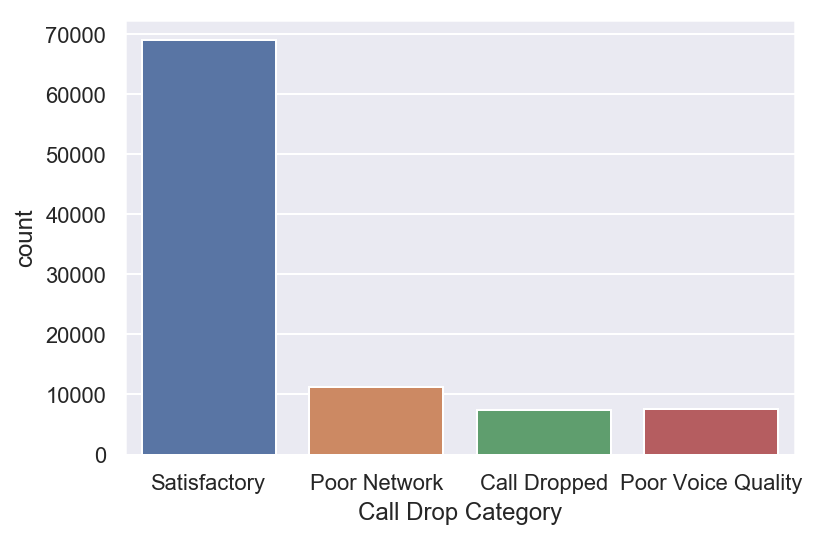

In [183]:
sns.countplot(data=dataset, x='Call Drop Category')

- Data set is largely imbalanced, as we see majority of data contains Satisfactory Label

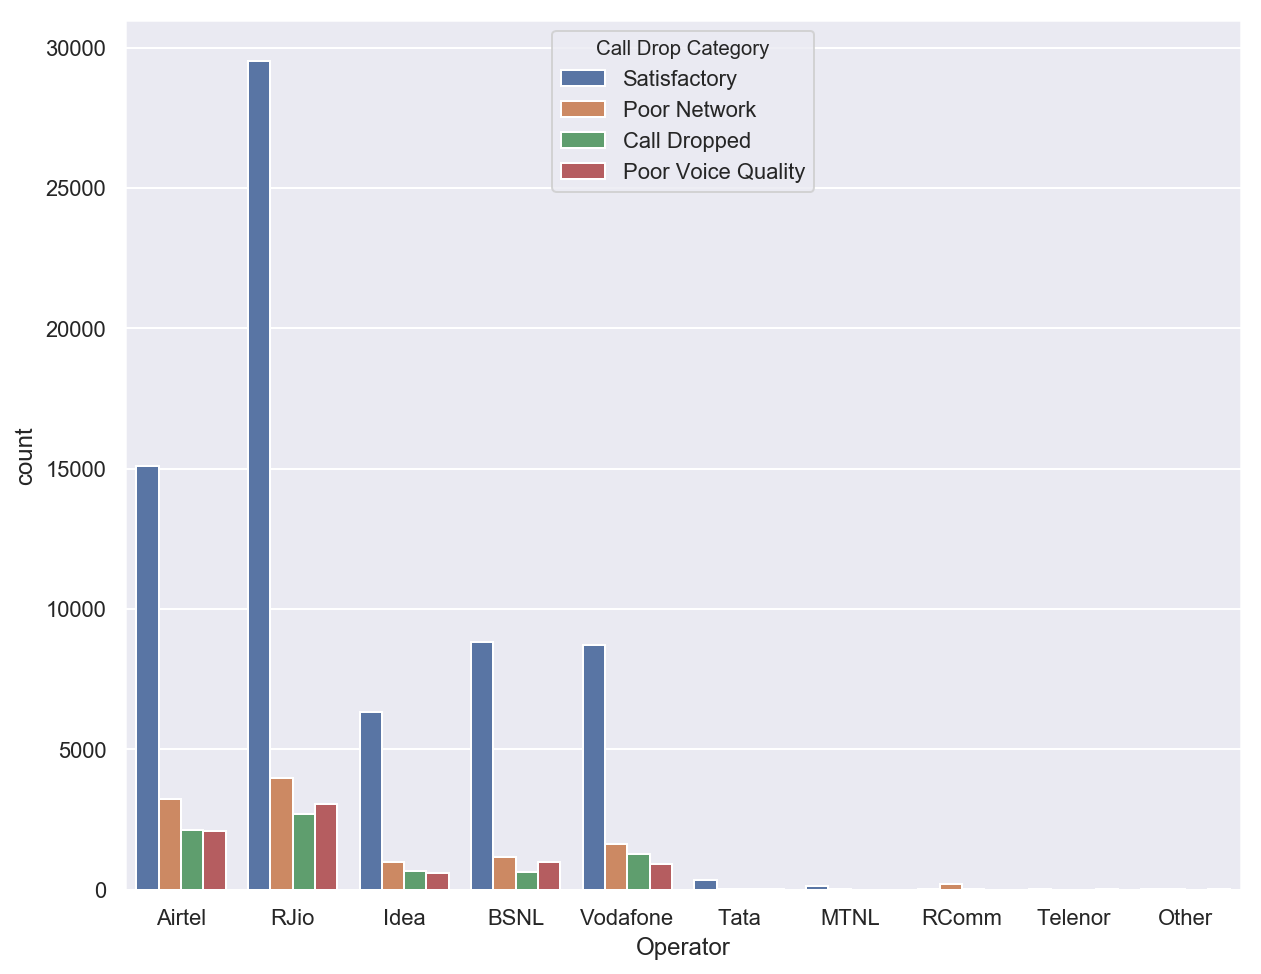

In [184]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataset, x='Operator', hue ='Call Drop Category')

In [185]:
dataset.Operator.value_counts()

RJio        39220
Airtel      22540
Vodafone    12510
BSNL        11612
Idea         8559
Tata          421
RComm         219
MTNL          144
Telenor        47
Other          45
Name: Operator, dtype: int64

- Should consider removing operators where observations are below 500

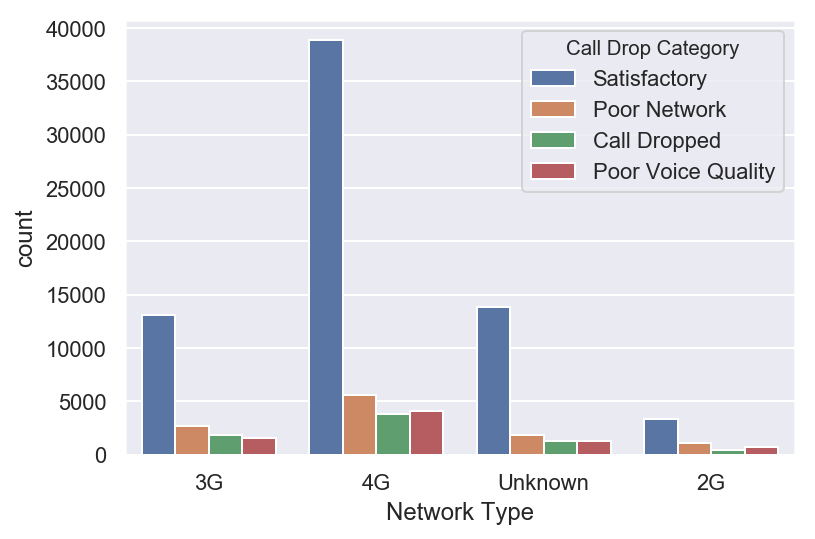

In [186]:
sns.countplot(x='Network Type' , data=dataset,hue='Call Drop Category')

<Figure size 720x720 with 0 Axes>

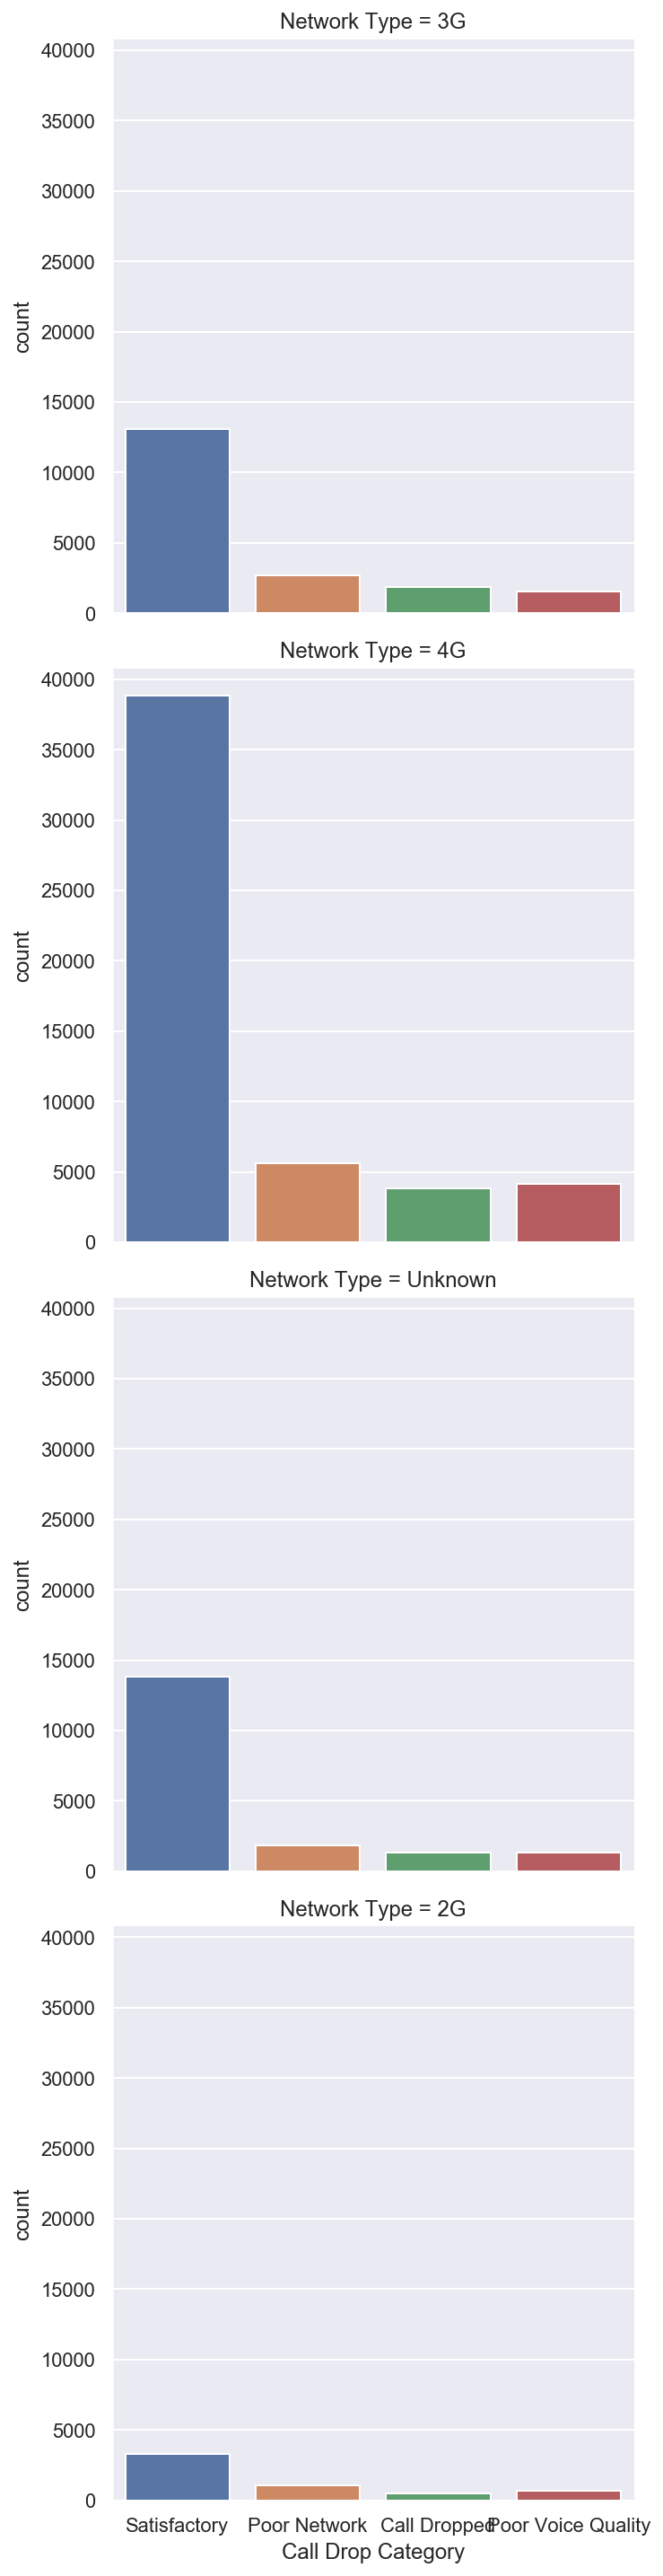

In [187]:
plt.figure(figsize=(10,10))

sns.catplot(x='Call Drop Category',row= 'Network Type',data=dataset, kind="count")

<Figure size 720x720 with 0 Axes>

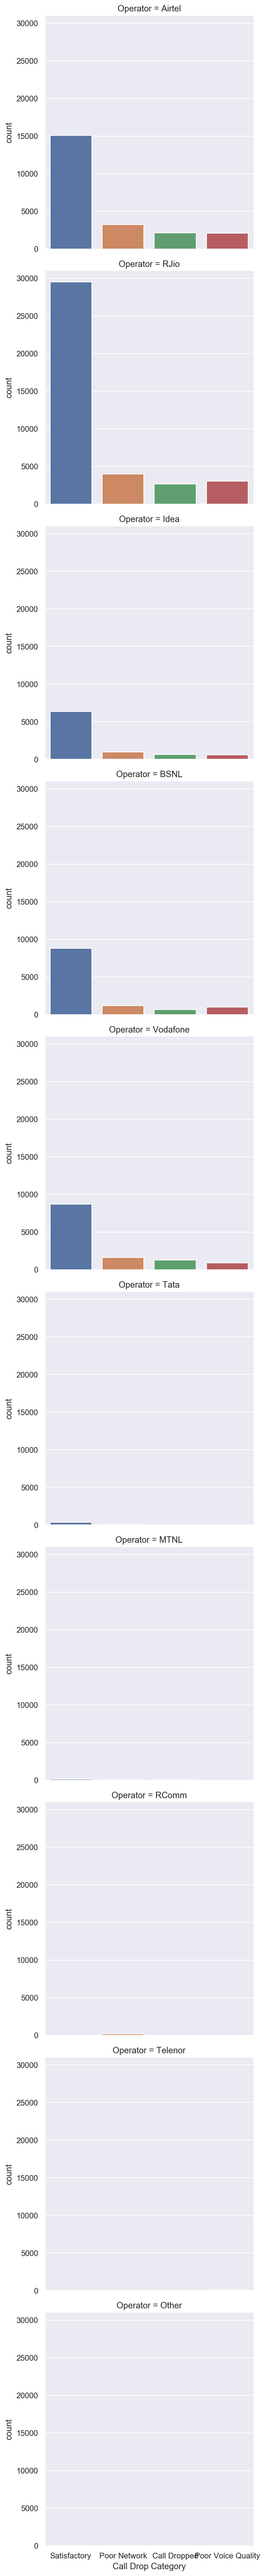

In [188]:
plt.figure(figsize=(10,10))

sns.catplot(x='Call Drop Category',row='Operator',data=dataset, kind="count")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

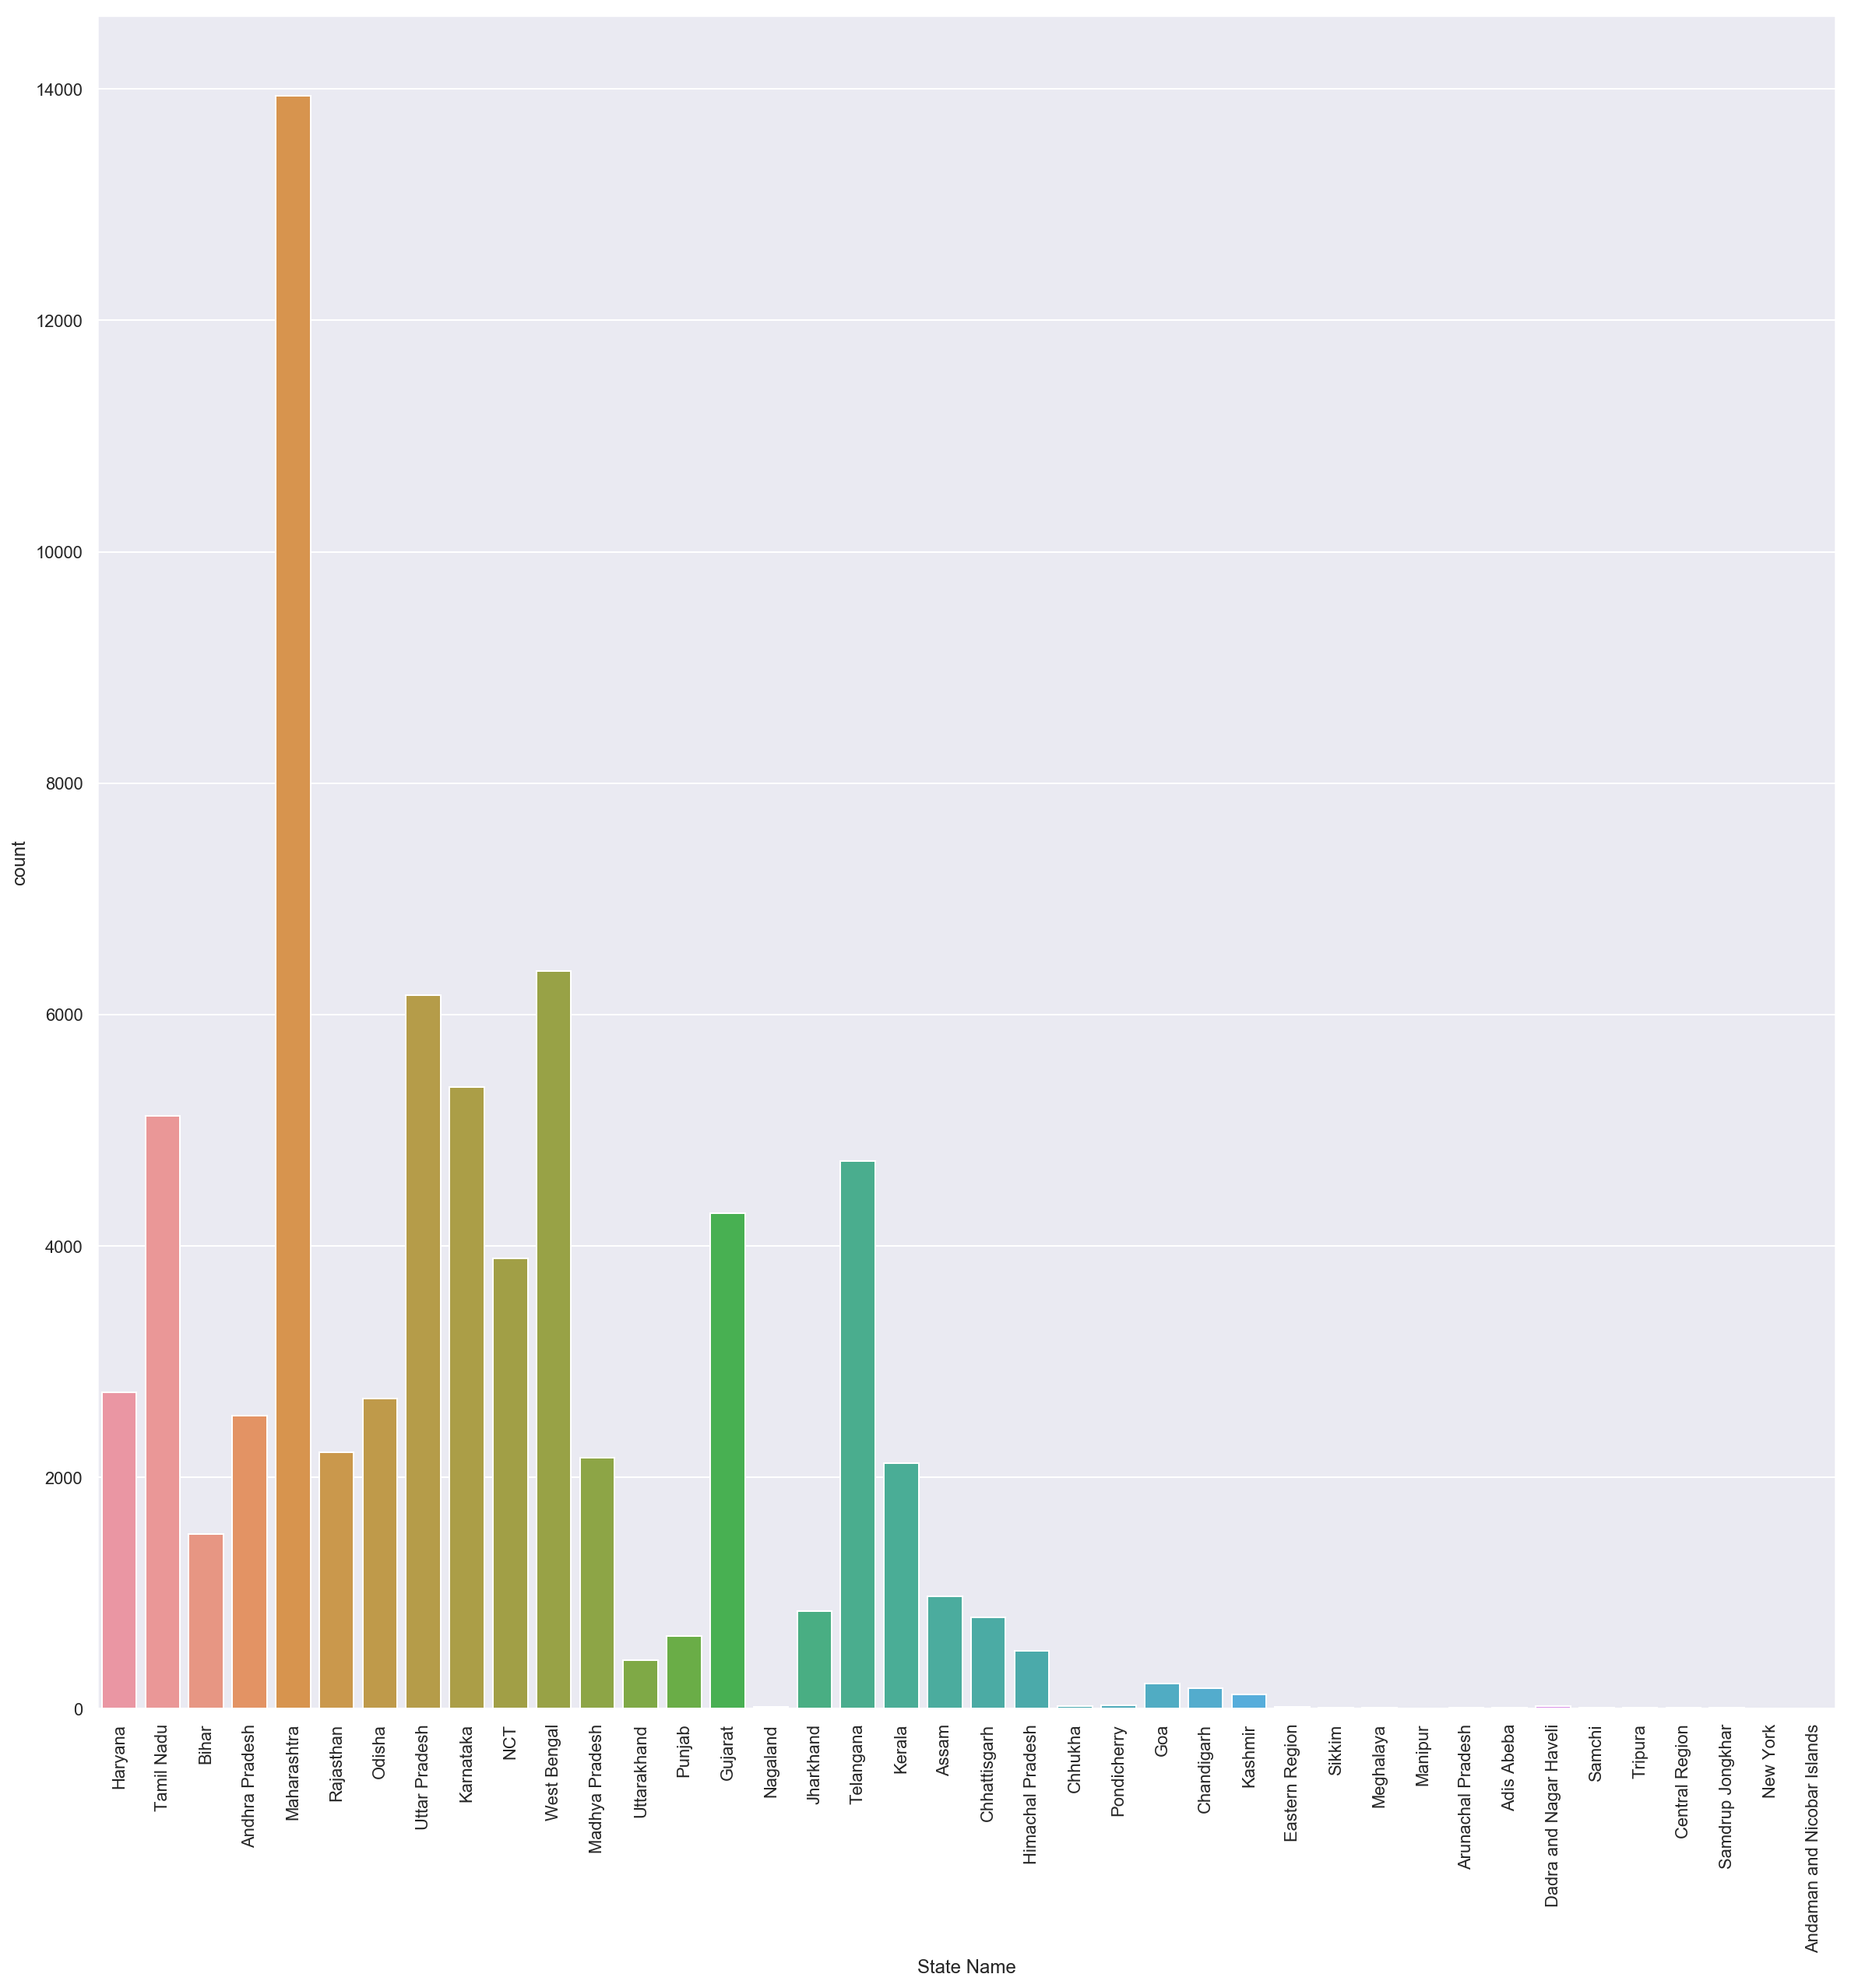

In [189]:
plt.figure(figsize=(20,20))

sns.countplot(x='State Name', data=dataset)
plt.xticks(rotation=90)

- Recommendations for Cleaning : 
    1. Remove states with less than 1000 observations 
    2. Remove telecos with less than 500 observations 

In [190]:
dataset['State Name'].unique()

array(['Haryana', 'Tamil Nadu', 'Bihar', 'Andhra Pradesh', 'Maharashtra',
       'Rajasthan', 'Odisha', nan, 'Uttar Pradesh', 'Karnataka', 'NCT',
       'West Bengal', 'Madhya Pradesh', 'Uttarakhand', 'Punjab',
       'Gujarat', 'Nagaland', 'Jharkhand', 'Telangana', 'Kerala', 'Assam',
       'Chhattisgarh', 'Himachal Pradesh', 'Chhukha', 'Pondicherry',
       'Goa', 'Chandigarh', 'Kashmir', 'Eastern Region', 'Sikkim',
       'Meghalaya', 'Manipur', 'Arunachal Pradesh', 'Adis Abeba',
       'Dadra and Nagar Haveli', 'Samchi', 'Tripura', 'Central Region',
       'Samdrup Jongkhar', 'New York', 'Andaman and Nicobar Islands'],
      dtype=object)

In [191]:
#sns.stripplot(x= dataset.index.values,y='Rating',data=dataset)

# 3. Data Preparation

## 3.1 Data Cleaning

a. Remove all rows with Missing State Names 

In [192]:
dataset = dataset.dropna(axis=0,how='any')

In [224]:
df2 = dataset.copy()

In [225]:
df2.head()

,Operator,Indoor_Outdoor_Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,3G,5,Satisfactory,28.422966,76.912324,Haryana
1,RJio,Indoor,4G,4,Satisfactory,11.158358,77.301897,Tamil Nadu
2,Airtel,Outdoor,3G,5,Satisfactory,28.422931,76.912253,Haryana
3,Airtel,Travelling,3G,5,Satisfactory,28.422947,76.912260,Haryana
4,RJio,Indoor,4G,5,Satisfactory,25.625990,85.094294,Bihar


In [226]:
df2 = df2.drop(['Latitude','Longitude','Rating'], axis=1)

In [227]:
df2.head()

,Operator,Indoor_Outdoor_Travelling,Network Type,Call Drop Category,State Name
0,Airtel,Indoor,3G,Satisfactory,Haryana
1,RJio,Indoor,4G,Satisfactory,Tamil Nadu
2,Airtel,Outdoor,3G,Satisfactory,Haryana
3,Airtel,Travelling,3G,Satisfactory,Haryana
4,RJio,Indoor,4G,Satisfactory,Bihar


In [239]:
df3 = pd.concat([dataset[['Latitude', 'Longitude', 'Rating','Call Drop Category']],
          pd.get_dummies(df2[['Operator','Indoor_Outdoor_Travelling','Network Type','State Name']])], axis=1)
df3.head()

,Latitude,Longitude,Rating,Call Drop Category,Operator_Airtel,Operator_BSNL,Operator_Idea,Operator_MTNL,Operator_Other,Operator_RComm,Operator_RJio,Operator_Tata,Operator_Telenor,Operator_Vodafone,Indoor_Outdoor_Travelling_Indoor,Indoor_Outdoor_Travelling_Outdoor,Indoor_Outdoor_Travelling_Travelling,Network Type_2G,Network Type_3G,Network Type_4G,Network Type_Unknown,State Name_Adis Abeba,State Name_Andaman and Nicobar Islands,State Name_Andhra Pradesh,State Name_Arunachal Pradesh,State Name_Assam,State Name_Bihar,State Name_Central Region,State Name_Chandigarh,State Name_Chhattisgarh,State Name_Chhukha,State Name_Dadra and Nagar Haveli,State Name_Eastern Region,State Name_Goa,State Name_Gujarat,State Name_Haryana,State Name_Himachal Pradesh,State Name_Jharkhand,State Name_Karnataka,State Name_Kashmir,State Name_Kerala,State Name_Madhya Pradesh,State Name_Maharashtra,State Name_Manipur,State Name_Meghalaya,State Name_NCT,State Name_Nagaland,State Name_New York,State Name_Odisha,State Name_Pondicherry,State Name_Punjab,State Name_Rajasthan,State Name_Samchi,State Name_Samdrup Jongkhar,State Name_Sikkim,State Name_Tamil Nadu,State Name_Telangana,State Name_Tripura,State Name_Uttar Pradesh,State Name_Uttarakhand,State Name_West Bengal
0,28.422966,76.912324,5,Satisfactory,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11.158358,77.301897,4,Satisfactory,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,28.422931,76.912253,5,Satisfactory,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,28.422947,76.912260,5,Satisfactory,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25.625990,85.094294,5,Satisfactory,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Encode the Variable being Predicted using map method 

In [240]:
dataset['Call Drop Category'].unique()

array(['Satisfactory', 'Poor Network', 'Call Dropped',
       'Poor Voice Quality'], dtype=object)

In [241]:
df3['Call Drop Category'] = df3['Call Drop Category'].map({'Satisfactory':1, 'Poor Network':2,'Call Dropped':3,'Poor Voice Quality':4})

In [243]:
df3['Call Drop Category'].unique()

array([1, 2, 3, 4], dtype=int64)

## 4. Random Forest Classifier 

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [244]:
X = df3.drop(['Latitude','Longitude','Call Drop Category'],axis=1)
y = df3['Call Drop Category']


In [245]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [247]:
x_test.shape

(21201, 58)

In [249]:
rf = RandomForestClassifier(n_estimators = 500, min_samples_split = 30)

In [250]:
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [251]:
pred = rf.predict(x_test)

In [255]:
metrics.accuracy_score(y_test, pred) 

0.841847082684779

In [256]:
print(metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred))

[[14969   282   126   144]
 [  343  1486   267   299]
 [  158   495   735   179]
 [  316   565   179   658]]
             precision    recall  f1-score   support

          1       0.95      0.96      0.96     15521
          2       0.53      0.62      0.57      2395
          3       0.56      0.47      0.51      1567
          4       0.51      0.38      0.44      1718

avg / total       0.84      0.84      0.84     21201

